In [2]:
from os.path import join as pjoin
import sys 
sys.path.append('/home/hhansen/DecontextEmbeddings')
import os 
os.environ['EMBEDDING_EVALUATION_DATA_PATH'] = '/home/hhansen/DecontextEmbeddings/helpers/embedding_evaluation/data/'
DATA_DIR = '/home/hhansen/DecontextEmbeddings/data'
os.environ['DATA_DIR'] = DATA_DIR
FIGURE_OUTPUT_DIR = pjoin(DATA_DIR, 'figures', 'things_frrsa')

import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from helpers.embedding_evaluation.evaluate import Evaluation as wordsim_evaluate
from helpers.things_evaluation.evaluate import read_embeddings, load_behav, load_sorting, match_behv_sim, evaluate as run_evaluation
from helpers.data import yield_static_data
from helpers.intersection import get_intersection_words
from helpers.plot import get_ax,set_style_and_font_size, model_prettify
set_style_and_font_size()

from scipy.stats import spearmanr, pearsonr
from collections import defaultdict
import os 

/home/hhansen/decon/decon_env/DecontextEmbeddings/data


In [3]:
matching = 'word'

In [4]:
with open(f'frrsa_results_static.pkl', 'rb') as r_file:
    results_frrsa_static = pickle.load(r_file)

In [5]:
with open(f'frrsa_results_synset.pkl', 'rb') as r_file:
    results_frrsa_synset = pickle.load(r_file)

In [6]:
with open(f'frrsa_results_main_word.pkl', 'rb') as r_file:
    results_frrsa_main_word = pickle.load(r_file)

In [7]:
combs = {
            'bert-base': range(13),
            'bert-large':  range(25),
            'gpt-2': range(13),
            'gpt-2-medium': range(25)

}

corpus = 'wikidumps'
results = defaultdict(list) 
matching = 'main_word'

matching_words_things = get_intersection_words(1, matching=matching, corpus_folder=corpus, folder='thinga')
print(f'use {len(matching_words_things)} for things')
    
for model, embedding_path, static_matching in yield_static_data('thinga'):
    pearson, spearman, matrix, vector = run_evaluation(embedding_path, matching=static_matching, matching_words=matching_words_things)
    results[model] = spearman.correlation

for model, layers in combs.items():
    for layer in layers:
        path = f'{EMBEDDING_DATA_DIR}/thinga/{corpus}/decontext/{model}/{layer}/{matching}/mean/all/decontext.txt'
        pearson, spearman, matrix, vector = run_evaluation(path, matching=matching, matching_words=matching_words_things)
        results[model].append(spearman.correlation)

('w2v', '/home/hhansen/decon/decon_env/data/thinga/static/w2v/word2vec-google-news-300/embeddings.txt', 'word')
('glove', '/home/hhansen/decon/decon_env/data/thinga/static/glove/glove-wiki-gigaword-300/embeddings.txt', 'word')
('deconf', '/home/hhansen/decon/decon_env/data/thinga/static/deconf/embeddings.txt', 'synset')
Number of words intersection: 1522
use 1522 for things
('w2v', '/home/hhansen/decon/decon_env/data/thinga/static/w2v/word2vec-google-news-300/embeddings.txt', 'word')
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
('glove', '/home/hhansen/decon/decon_env/data/thinga/static/glove/glove-wiki-gigaword-300/embeddings.txt', 'word')
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 

Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe'

Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe',
       ...
       'wrist', 'xylophone', 'yacht', 'yak', 'yogurt', 'yoke', 'yolk', 'zebra',
       'zipper', 'zucchini'],
      dtype='object', name='things_id', length=1522)
Index(['aardvark', 'abacus', 'accordion', 'acorn', 'airbag', 'airplane',
       'album', 'alligator', 'almond', 'aloe'

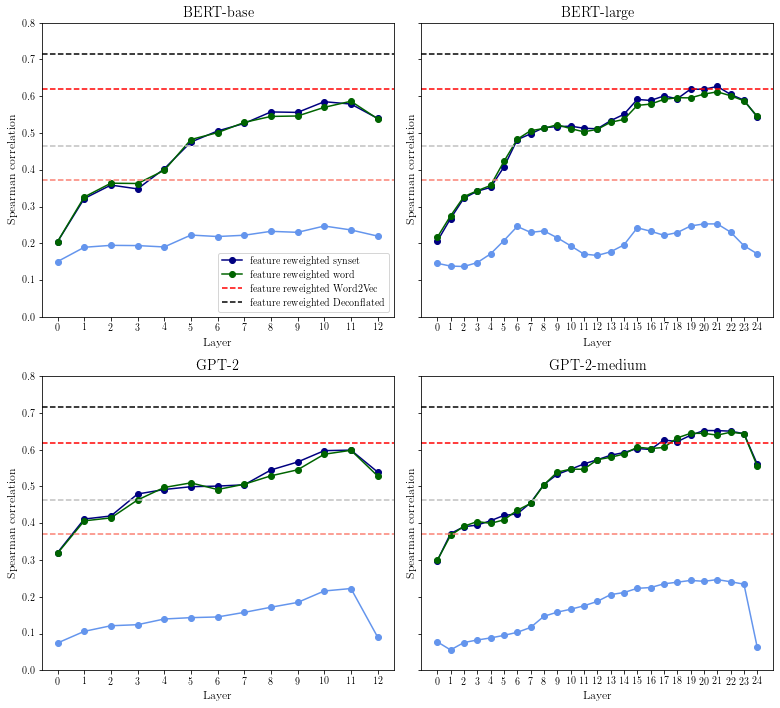

In [11]:
fig, axes = plt.subplots(2,2, sharey=True, figsize=(11,10))

for i, _ in enumerate(combs.items()):
    model, layers = _
    ax = get_ax(axes, i)
        
    layer_corrs_synset = [results_frrsa_synset[model][i][0] for i, v in enumerate(results_frrsa_synset[model])]
    ax.plot(layers, layer_corrs_synset, marker='o', label='feature reweighted synset', c='navy')
        
    layer_corrs_word = [results_frrsa_main_word[model][i][0] for i, v in enumerate(results_frrsa_main_word[model])]
    ax.plot(layers, layer_corrs_word, marker='o', label='feature reweighted word', c='darkgreen')
        
    ax.plot(layers, results[model], marker='o', c='cornflowerblue')
    ax.set_title(model_prettify(model))

    ax.set_xlabel('Layer')
    ax.set_xticks(layers)
    ax.set_ylabel('Spearman correlation')
    ax.set_ylim([0, 0.8])

    ax.axhline(y=results_frrsa_static['w2v'][0], color='red', linestyle='--', label=f'feature reweighted Word2Vec')
    #ax.axhline(y=results_frrsa_static['glove'][0], color='gold', linestyle='--', label=f'feature reweighted GloVe')
    ax.axhline(y=results_frrsa_static['deconf'][0], color='black', linestyle='--', label=f'feature reweighted Deconflated')

    ax.axhline(y=results['w2v'], color='salmon', linestyle='--')
    #ax.axhline(y=results['glove'], color='gold', linestyle='--')
    ax.axhline(y=results['deconf'], color='silver', linestyle='--')


axes[0][0].legend()
plt.tight_layout()
plt.savefig(f'frrsa.pdf', bbox_inches='tight')